In [ ]:
#SKILLCRIFT TECHNOLOGY SCT_DS_TSK 3

In [92]:
#DONE BY ALTHAF N

In [ ]:
#The analysis is based on the US Accidents Dataset, which provides detailed information about traffic accidents, including features like weather conditions, road types, time of the day, and contributing factors like traffic signals, junctions, and other amenities

In [1]:
pip install pandas matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv(r"C:\Users\altha\US_Accidents_March23.csv")

In [6]:
print(df.head())
print(df.info())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [7]:
#Data Preprocessing

In [10]:
print(df['Start_Time'].head())

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object


In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [14]:
print(df[df['Start_Time'].isna()])

                ID   Source  Severity Start_Time  \
3639775  A-3649658  Source1         2        NaT   
3639776  A-3649659  Source1         4        NaT   
3639777  A-3649660  Source1         3        NaT   
3639778  A-3649661  Source1         3        NaT   
3639779  A-3649662  Source1         3        NaT   
...            ...      ...       ...        ...   
6834080  A-6883265  Source1         2        NaT   
6834081  A-6883266  Source1         2        NaT   
6834082  A-6883267  Source1         2        NaT   
6834083  A-6883268  Source1         2        NaT   
6834084  A-6883269  Source1         2        NaT   

                              End_Time  Start_Lat   Start_Lng    End_Lat  \
3639775  2017-07-23 10:21:01.000000000  34.062650 -118.000680  34.061940   
3639776  2017-07-23 11:18:46.000000000  33.931460 -118.390730  33.931530   
3639777  2017-07-23 11:36:01.000000000  33.617890 -117.711160  33.611590   
3639778  2017-07-23 14:36:01.000000000  33.697590 -117.940060  33.69573

In [16]:
df = df.dropna(subset=['Start_Time'])

In [17]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [20]:
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

In [22]:
df['Weekday'] = df['Start_Time'].dt.day_name()

In [24]:
#Exploratory Data Analysis (EDA)

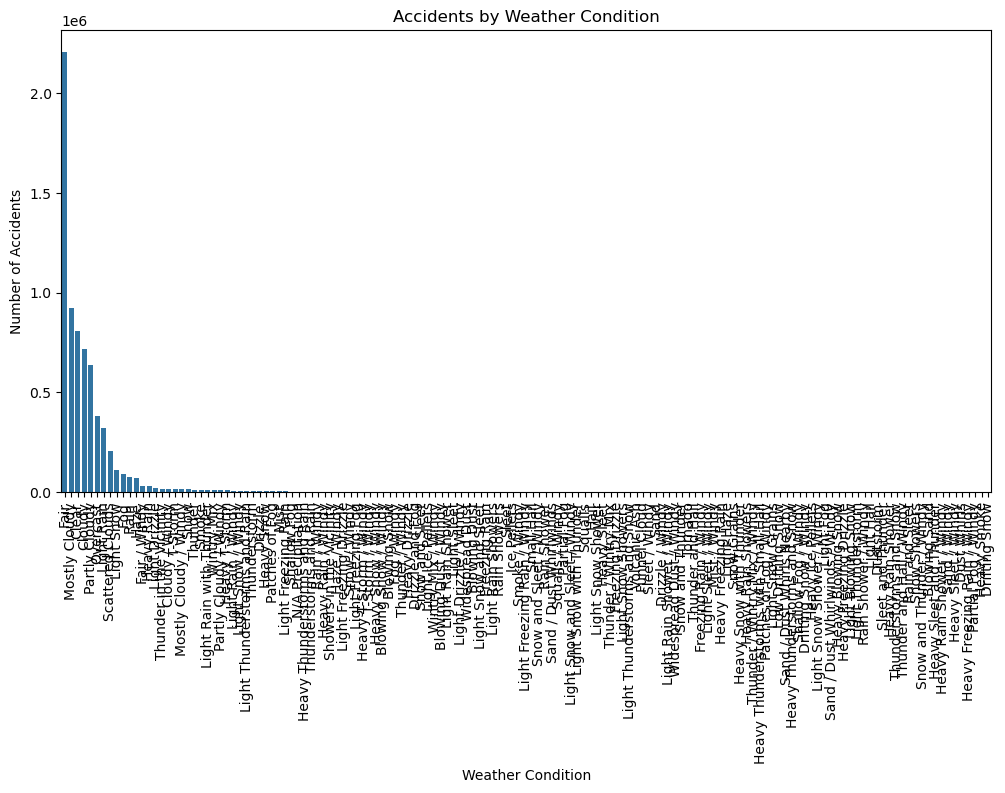

In [26]:
weather_accidents = df['Weather_Condition'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values)
plt.xticks(rotation=90)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

In [30]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'Weekday'],
      dtype='object')


ValueError: Unknown format code 'd' for object of type 'float'

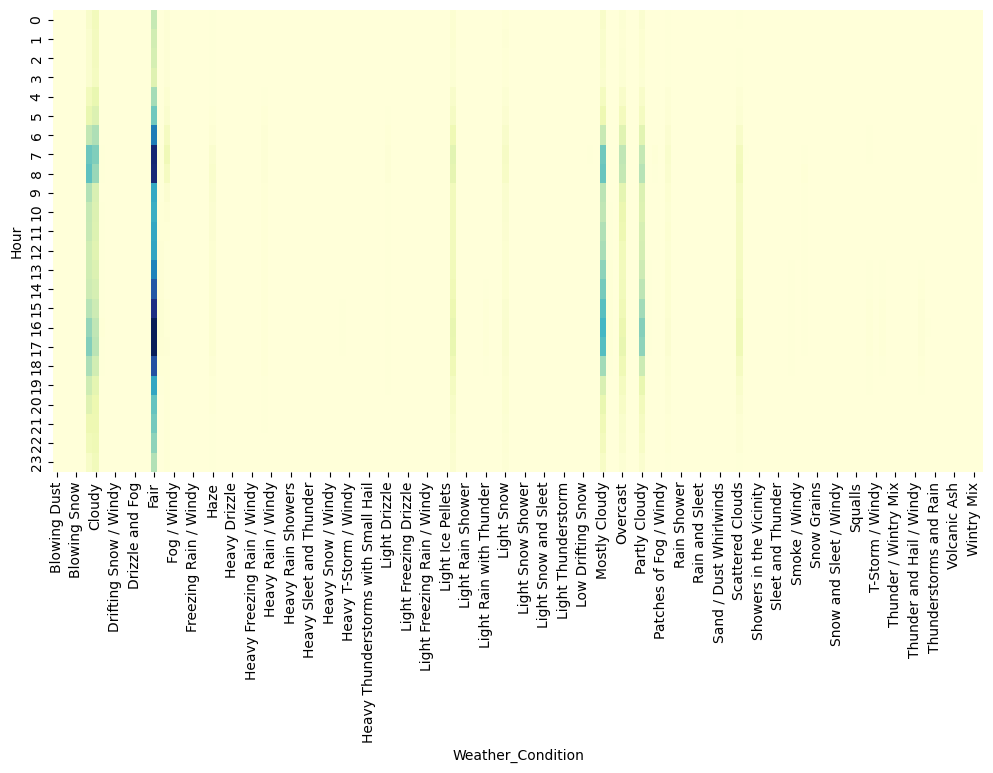

In [34]:
hour_weather_accidents = df.groupby(['Hour', 'Weather_Condition']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(hour_weather_accidents, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title('Accidents by Hour of Day and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Hour of Day')
plt.show()

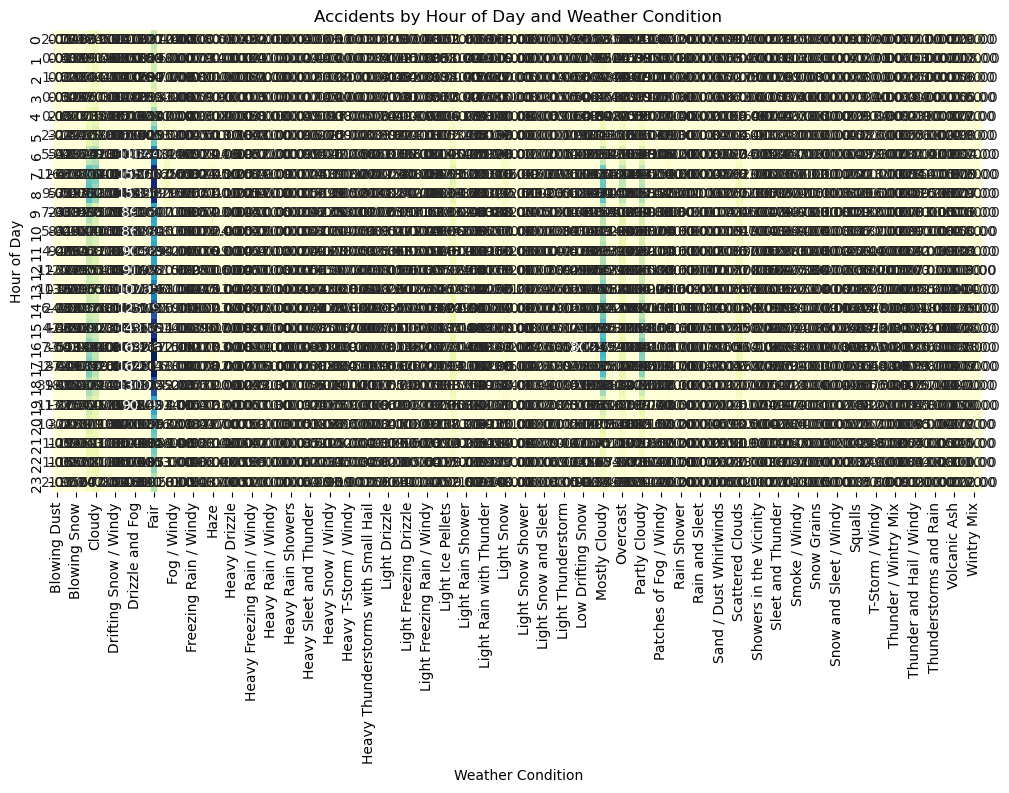

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(hour_weather_accidents, cmap="YlGnBu", annot=True, fmt=".2f", cbar=False)
plt.title('Accidents by Hour of Day and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Hour of Day')
plt.show()

In [64]:
condition_columns = [col for col in df.columns if 'Condition' in col]
print(condition_columns)

['Weather_Condition_encoded', 'Weather_Condition_Blowing Dust / Windy', 'Weather_Condition_Blowing Sand', 'Weather_Condition_Blowing Snow', 'Weather_Condition_Blowing Snow / Windy', 'Weather_Condition_Clear', 'Weather_Condition_Cloudy', 'Weather_Condition_Cloudy / Windy', 'Weather_Condition_Drifting Snow', 'Weather_Condition_Drifting Snow / Windy', 'Weather_Condition_Drizzle', 'Weather_Condition_Drizzle / Windy', 'Weather_Condition_Drizzle and Fog', 'Weather_Condition_Dust Whirls', 'Weather_Condition_Duststorm', 'Weather_Condition_Fair', 'Weather_Condition_Fair / Windy', 'Weather_Condition_Fog', 'Weather_Condition_Fog / Windy', 'Weather_Condition_Freezing Drizzle', 'Weather_Condition_Freezing Rain', 'Weather_Condition_Freezing Rain / Windy', 'Weather_Condition_Funnel Cloud', 'Weather_Condition_Hail', 'Weather_Condition_Haze', 'Weather_Condition_Haze / Windy', 'Weather_Condition_Heavy Blowing Snow', 'Weather_Condition_Heavy Drizzle', 'Weather_Condition_Heavy Freezing Drizzle', 'Weather_

In [62]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Thunderstorm',
       'Weather_Condition_Thunderstorms and Rain',
       'Weather_Condition_Thunderstorms and Snow', 'Weather_Condition_Tornado',
       'Weather_Condition_Volcanic Ash', 'Weather_Condition_Widespread Dust',
       'Weather_Condition_Widespread Dust / Windy',
       'Weather_Condition_Wintry Mix', 'Weather_Condition_Wintry Mix / Windy'],
      dtype='object', length=190)


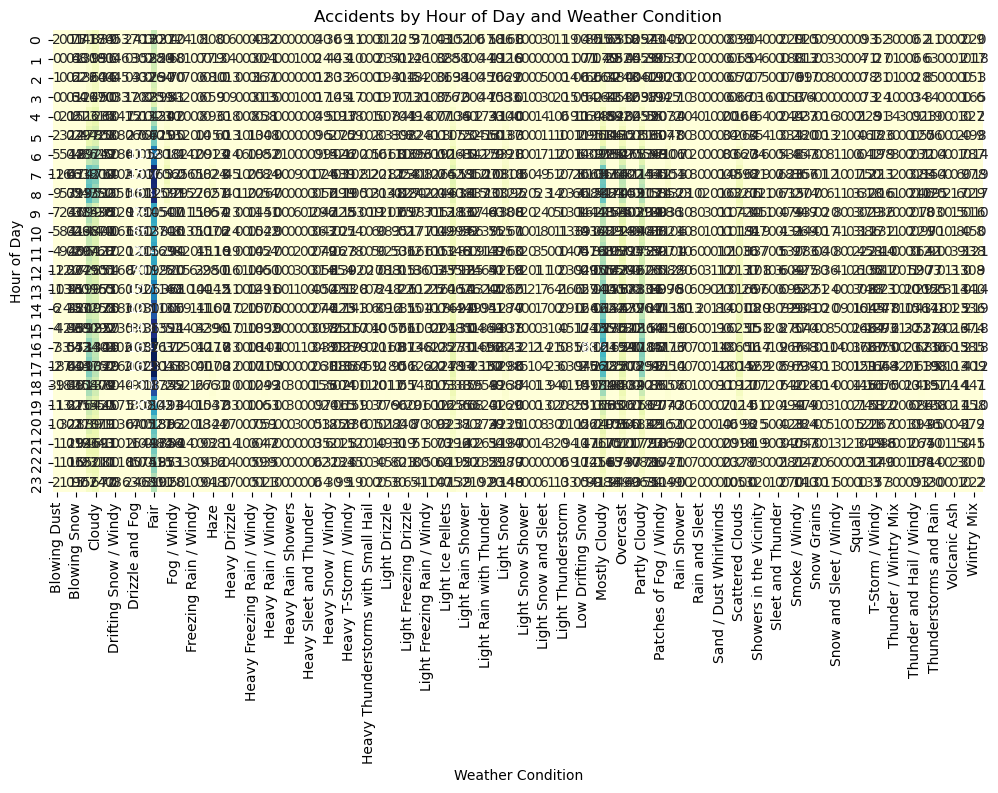

In [38]:
hour_weather_accidents = hour_weather_accidents.astype(int)

plt.figure(figsize=(12, 6))
sns.heatmap(hour_weather_accidents, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title('Accidents by Hour of Day and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Hour of Day')
plt.show()

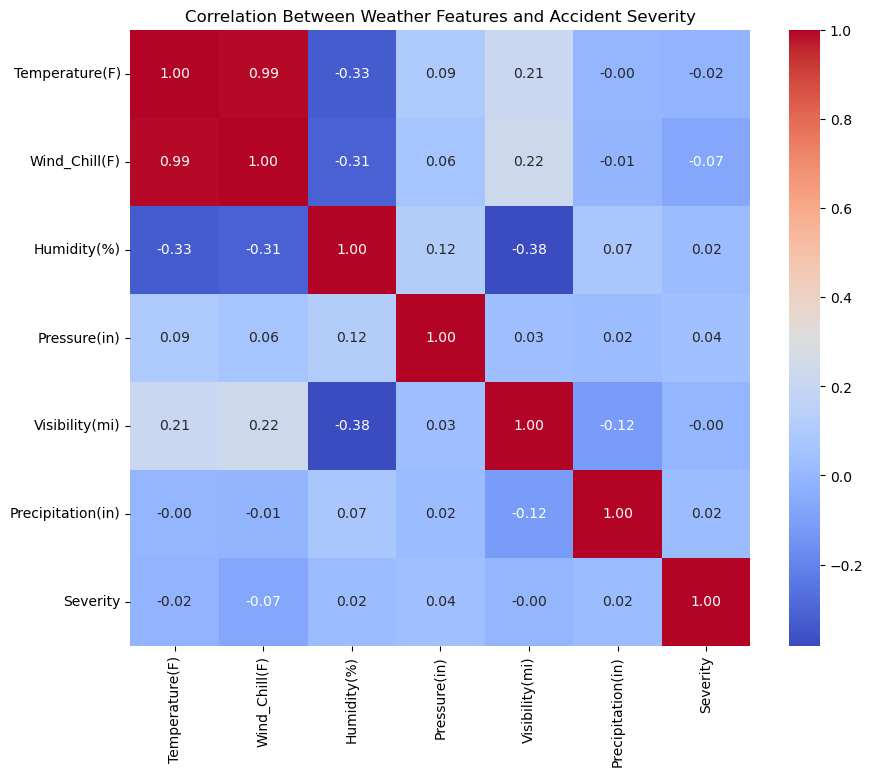

In [42]:
weather_features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Precipitation(in)']
correlation = df[weather_features + ['Severity']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weather Features and Accident Severity')
plt.show()

In [44]:
#Geospatial Analysis

In [46]:
fig = px.scatter_mapbox(df, lat="Start_Lat", lon="Start_Lng", color="Weather_Condition", 
                        size="Severity", hover_name="ID", color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, zoom=3, mapbox_style="carto-positron")
fig.show()

In [47]:
#Advanced Analysis

In [50]:
print(df.dtypes)

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64


In [ ]:
#Filter Out Numeric Columns

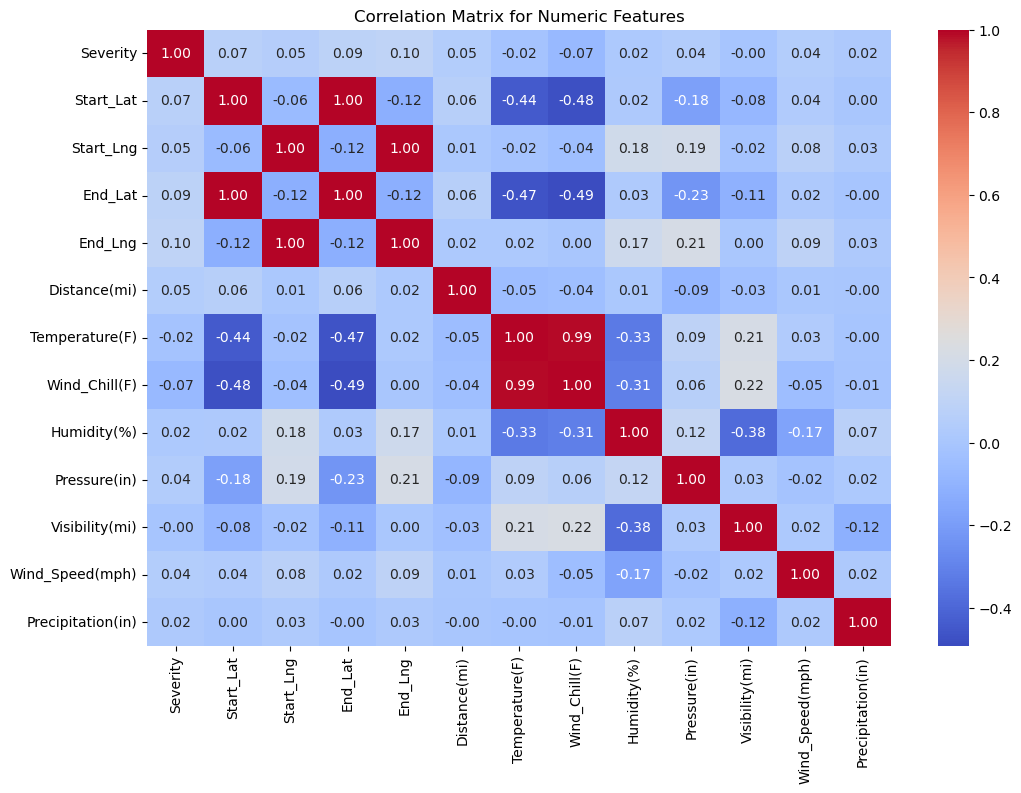

In [52]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
#Handling Categorical Columns 

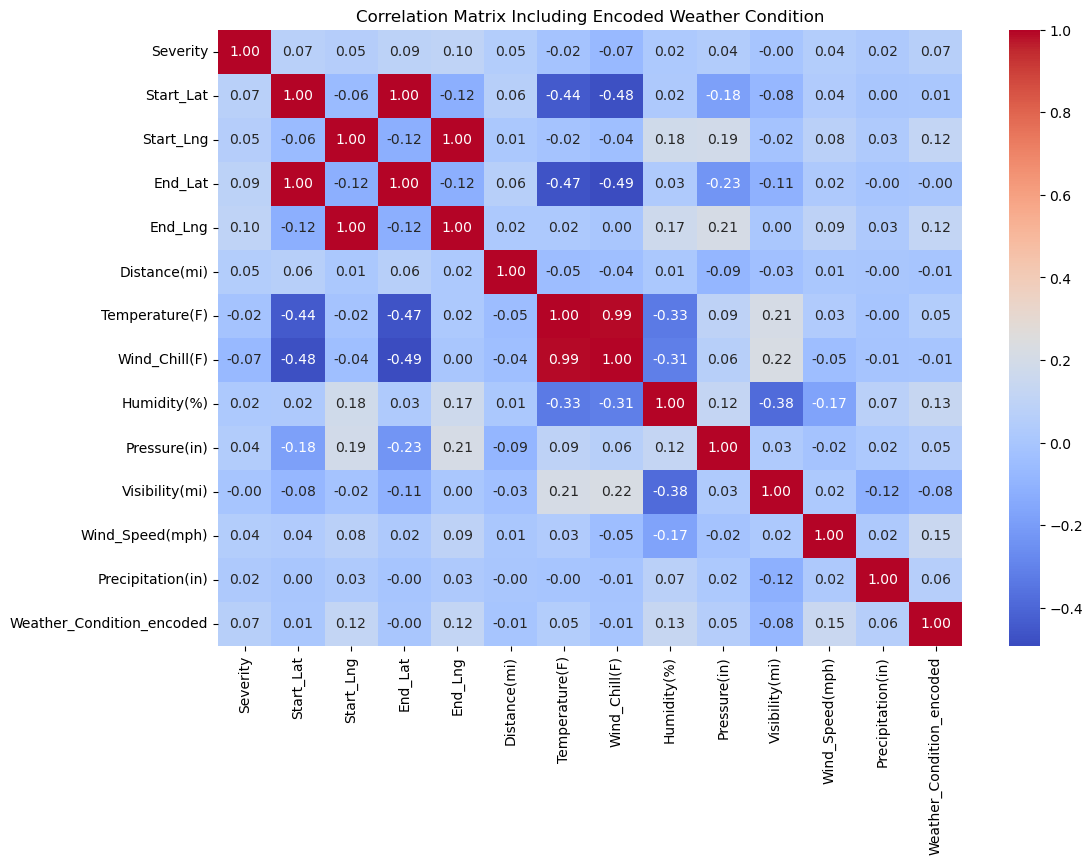

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Weather_Condition_encoded'] = label_encoder.fit_transform(df['Weather_Condition'])

numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()
numeric_df['Weather_Condition_encoded'] = df['Weather_Condition_encoded']

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Including Encoded Weather Condition')
plt.show()

In [ ]:
#update the correlation matrix.

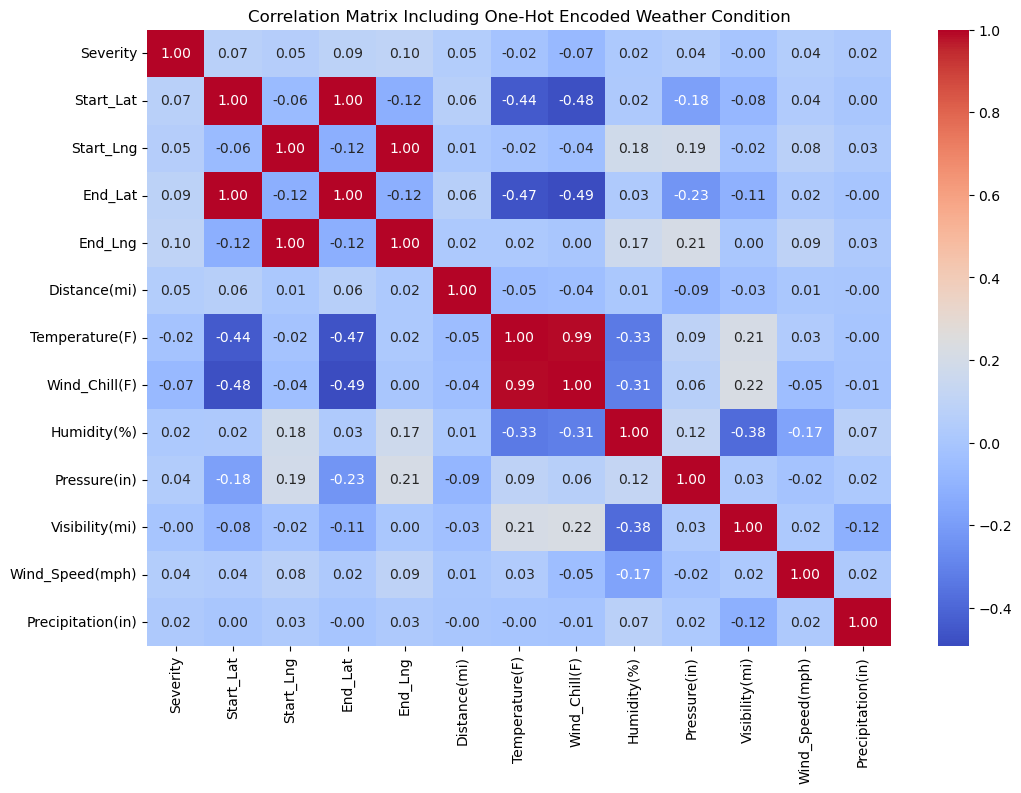

In [56]:
df = pd.get_dummies(df, columns=['Weather_Condition'], drop_first=True)

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Including One-Hot Encoded Weather Condition')
plt.show()


In [70]:
#Statistics of Numeric Columns


In [72]:
numeric_summary = df.describe()
print(numeric_summary)

           Severity                     Start_Time     Start_Lat  \
count  6.985228e+06                        6985228  6.985228e+06   
mean   2.229248e+00  2020-03-21 21:49:59.056442112  3.622647e+01   
min    1.000000e+00            2016-01-14 20:18:33  2.455480e+01   
25%    2.000000e+00  2018-09-17 02:20:31.750000128  3.342209e+01   
50%    2.000000e+00     2020-06-23 13:37:23.500000  3.581521e+01   
75%    2.000000e+00            2021-10-28 15:44:07  4.009647e+01   
max    4.000000e+00            2023-03-31 23:30:00  4.900220e+01   
std    4.988711e-01                            NaN  5.055433e+00   

          Start_Lng       End_Lat       End_Lng  Distance(mi)  Temperature(F)  \
count  6.985228e+06  3.582466e+06  3.582466e+06  6.985228e+06    6.839140e+06   
mean  -9.476577e+01  3.632363e+01 -9.606114e+01  5.168789e-01    6.168508e+01   
min   -1.246238e+02  2.456601e+01 -1.245457e+02  0.000000e+00   -8.900000e+01   
25%   -1.172176e+02  3.350703e+01 -1.178403e+02  0.000000e+00  

In [74]:
# Histograms for Numeric Columns

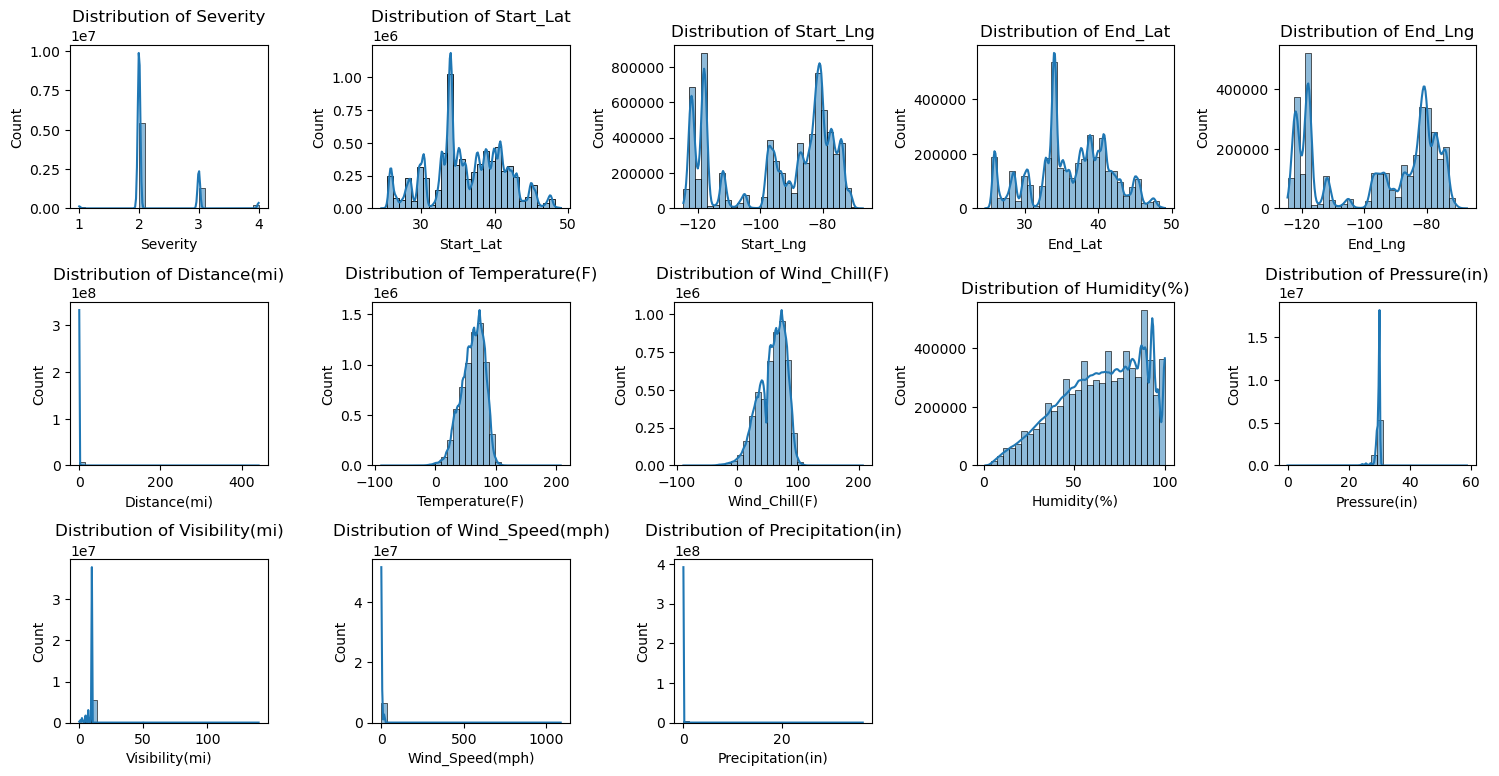

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i) 
    sns.histplot(df[column], kde=True, bins=30) 
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [77]:
#Box Plots for Numeric Columns

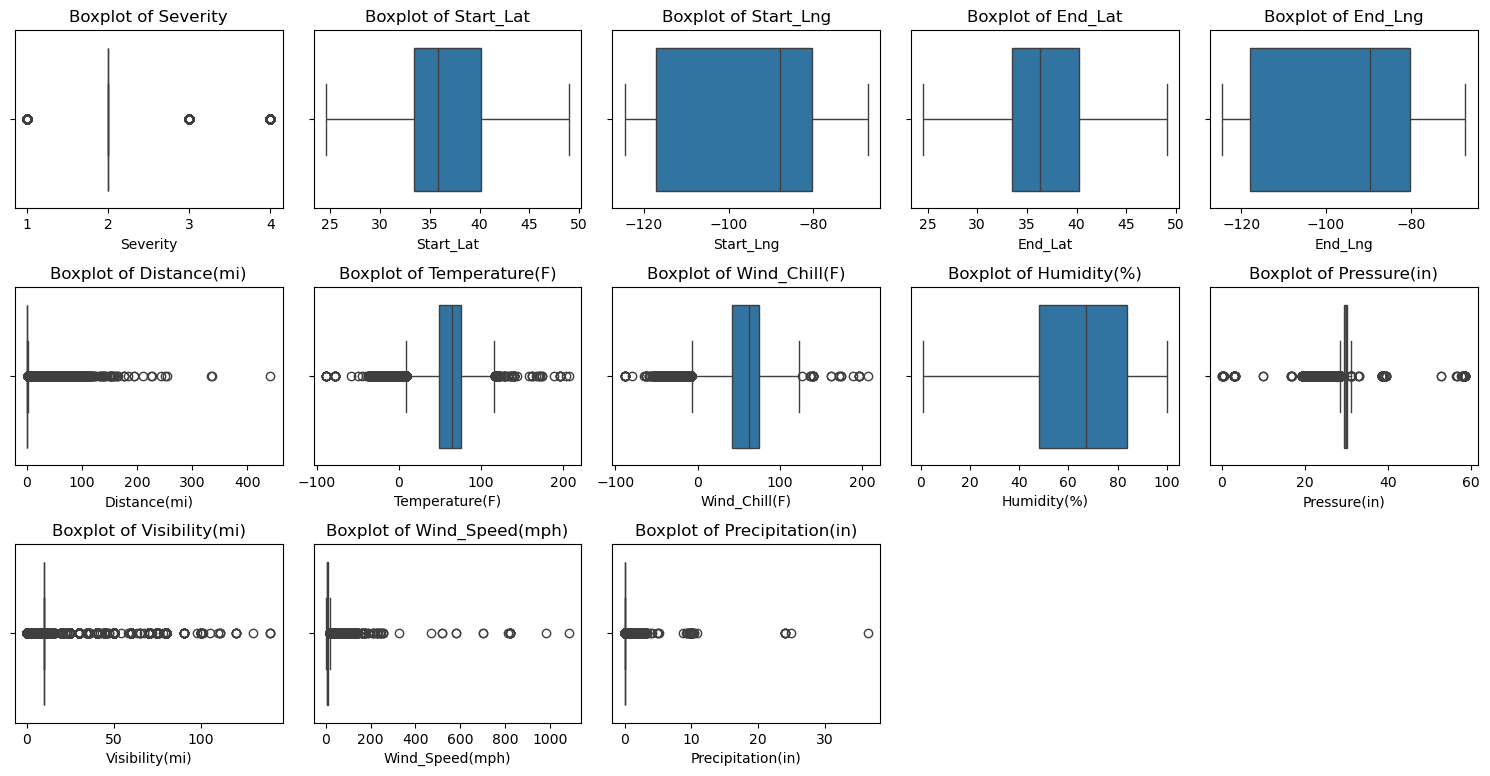

In [78]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)  
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [79]:
# Kernel Density Estimation (KDE) Plots

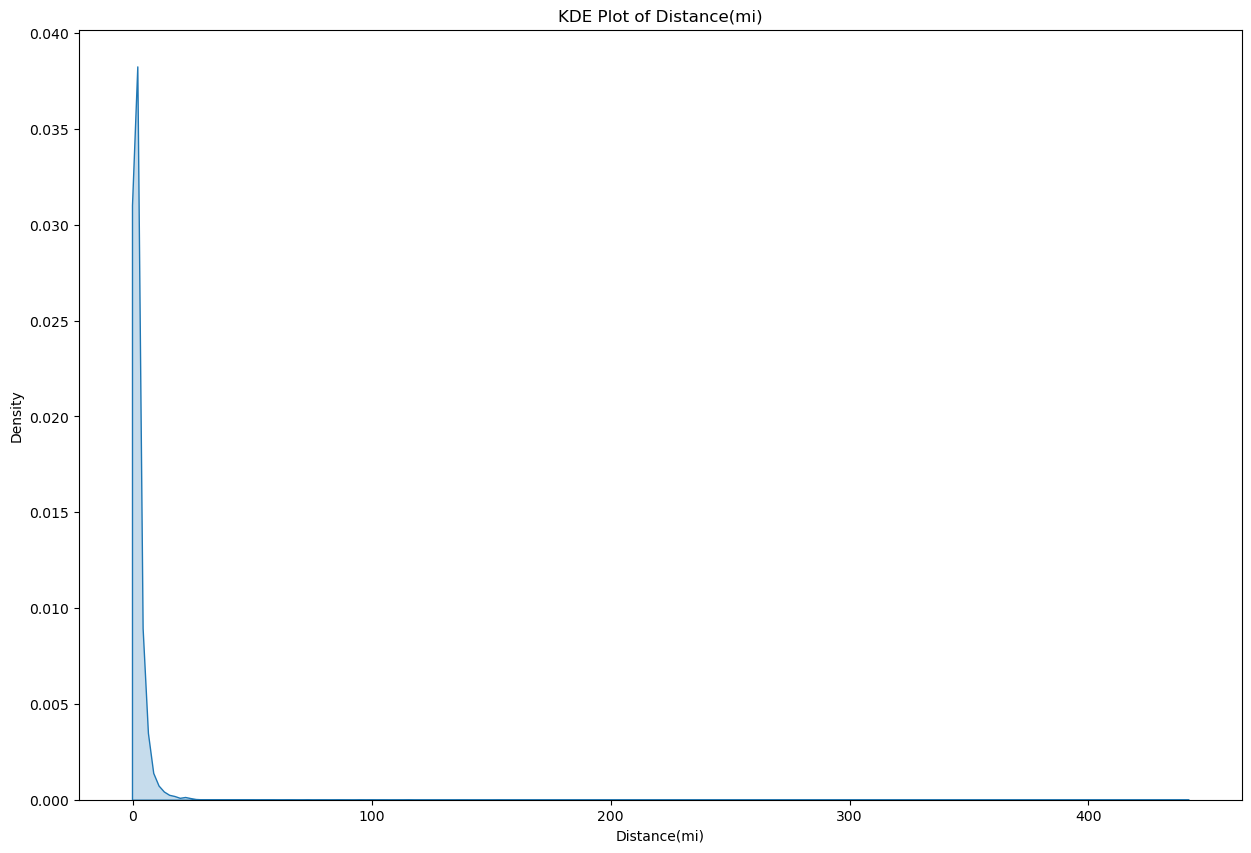

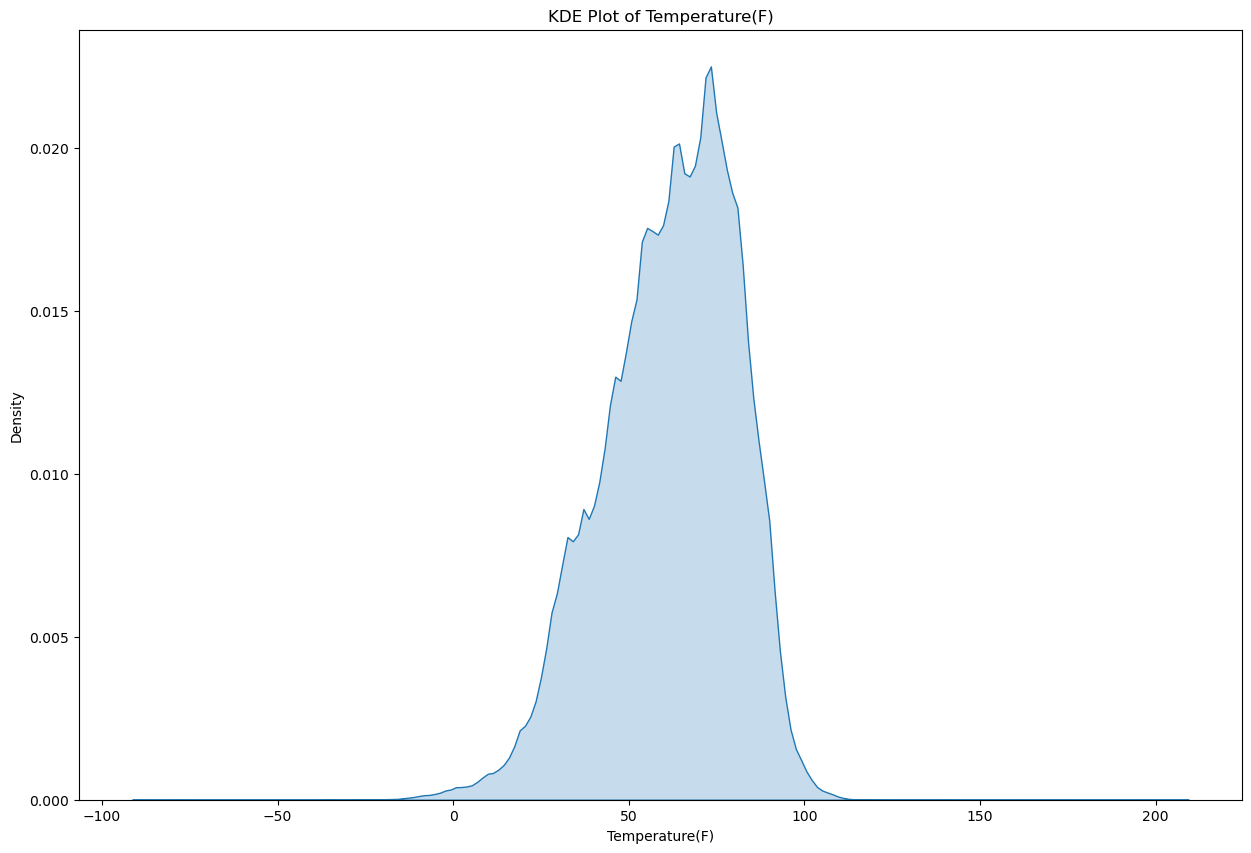

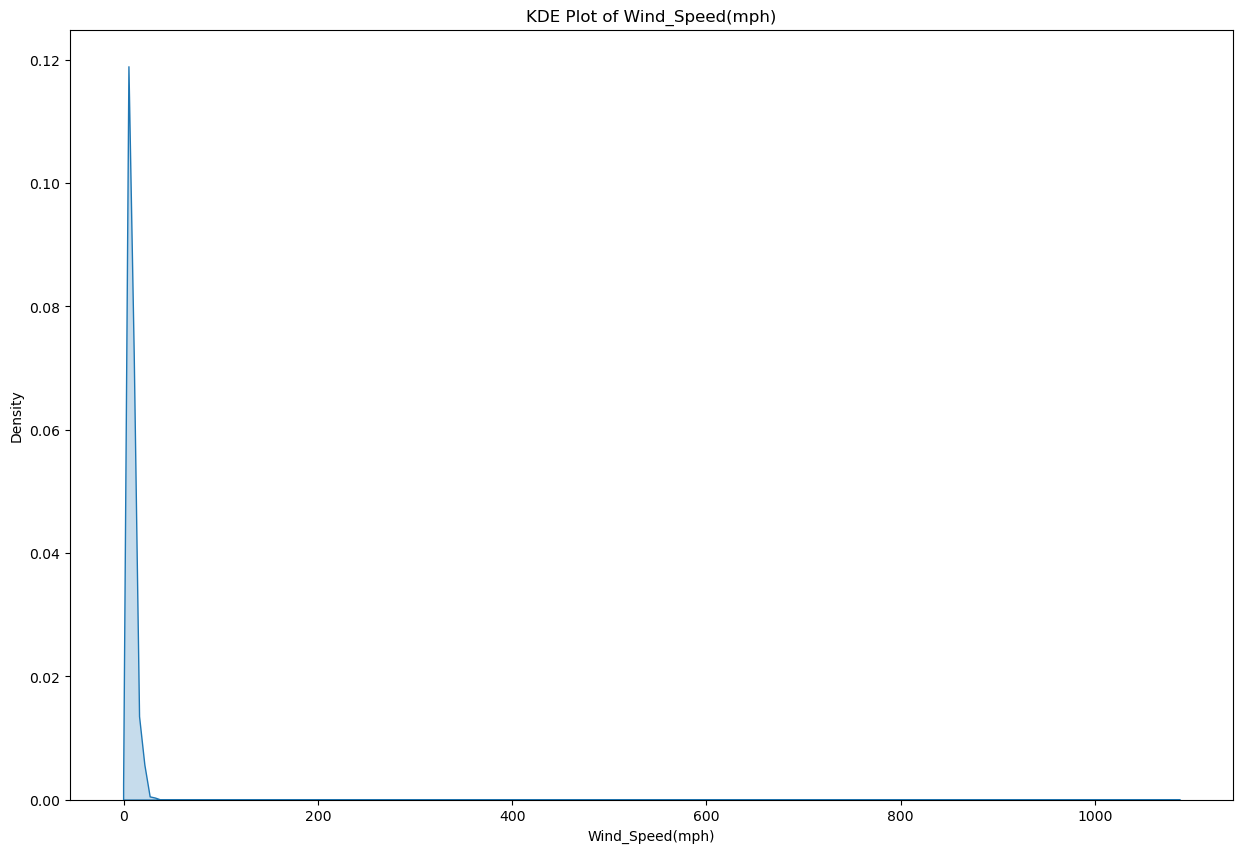

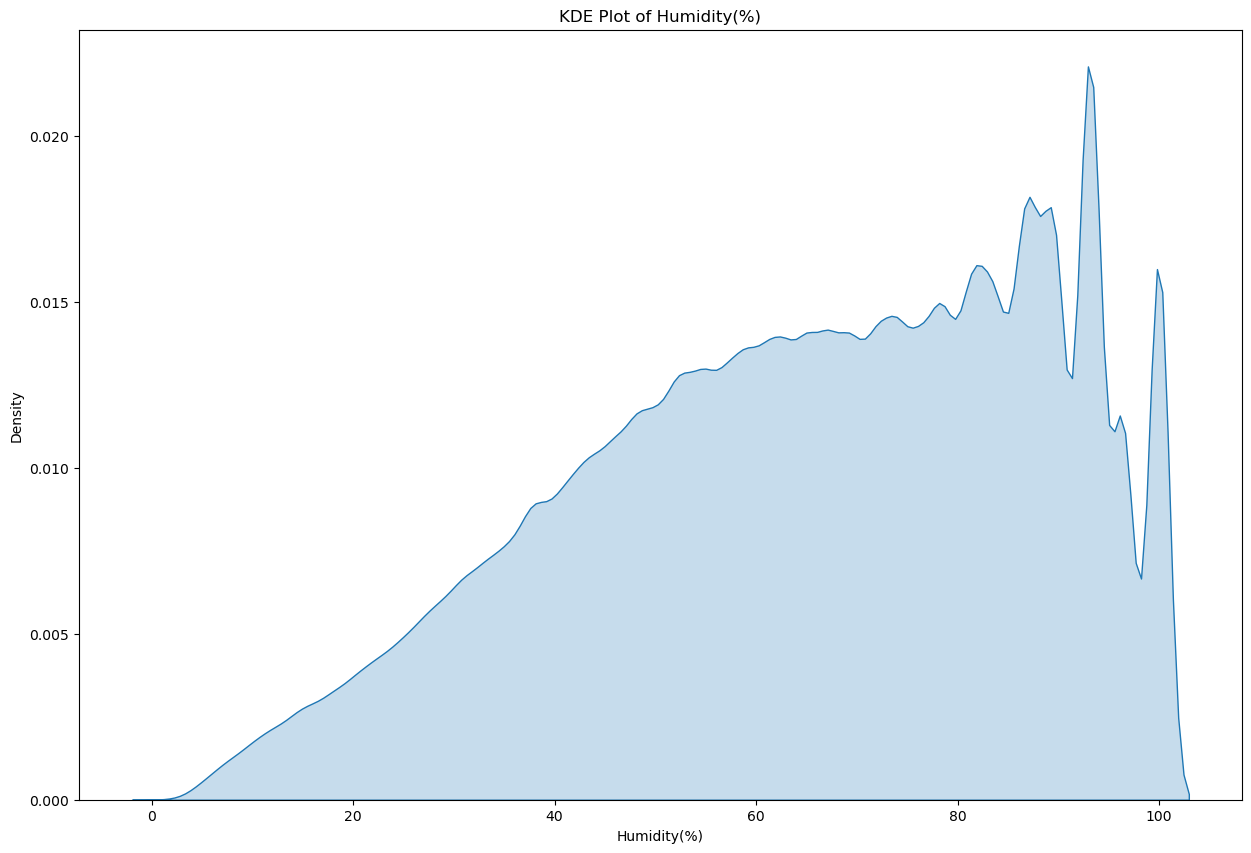

In [91]:
numeric_columns = ['Distance(mi)', 'Temperature(F)', 'Wind_Speed(mph)', 'Humidity(%)']
for column in numeric_columns:
    plt.figure(figsize=(15, 10))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.show()

In [ ]:
#Thank you